
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 4: Artificial Neural Networks [NOT SOLVED]

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2021-01-18)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_4/Session_4_ANNs_NOTSOLVED.ipynb)

**Resources:**
* Sklearn documentation

# Neural networks
A family of algorithms known as neural networks has become increasingly popular during the past few years under
the name “deep learning.” While deep learning shows great promise in many machine
learning applications, deep learning algorithms are often tailored very carefully to a
specific use case. Here, we will only discuss some relatively simple methods, namely
**multilayer perceptrons** for classification and regression, that can serve as a starting
point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
also known as (vanilla) **feed-forward neural networks**, or sometimes just neural
networks.

MLPs can be viewed as generalizations of linear models that perform multiple stages
of processing to come to a decision. Remember that the prediction by a linear regressor is given as:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

We could visualize this graphically as shown in the following figure:

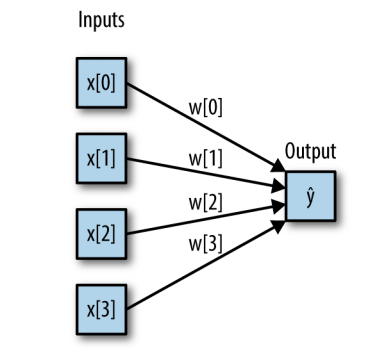

In an MLP this process of computing weighted sums is repeated multiple times, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums to yield the final result. Note that there can be several layers of hidden units, each of which will create a more complex representation of the input.

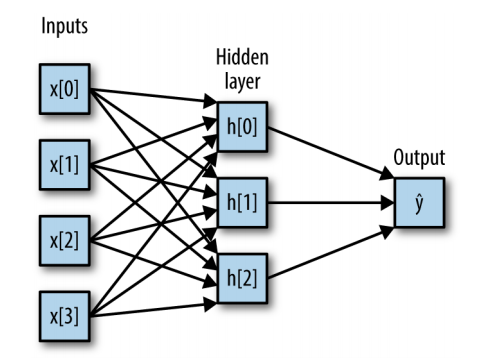


Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result.


## Moons dataset and ANNs
Let’s look into the workings of the MLP by applying the `MLPClassifier` to the
two_moons dataset. Import the `make_moons` method from sklearn and generate a dataset with 100 samples `noise=0.25` and `random_state=3`. Then make a scatter plot of the data.

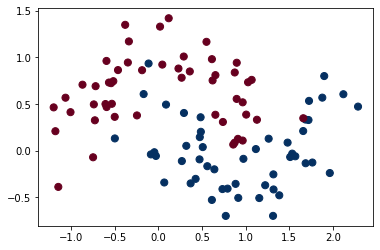

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Now import the `Perceptron` classifier from sklearn and apply it to the data.

In [ ]:
from sklearn.linear_model import Perceptron

perc = Perceptron(random_state=0,)
perc.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Function to visualize the input data and the decision function of the model,

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='RdBu', figsize=(7,7)):
    import numpy as np
    
    if ax is None:
        plt.figure(figsize=figsize)
    
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

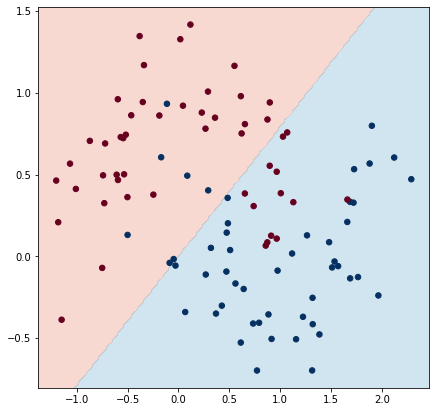

In [ ]:
visualize_classifier(perc, X, y)

Now import the `MLPClassifier`, set the random state to 0 and the solver to ```lbfgs```. Leave the rest of the parameters as default. Fit the MLP model and then plot the results using the above function.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0, solver= 'lbfgs')
mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

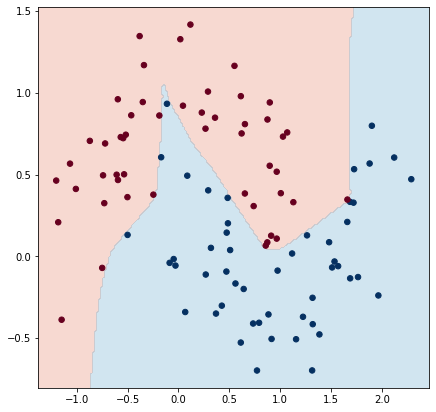

In [ ]:
visualize_classifier(mlp, X, y)

How many hidden units does the model have by default? Is this a good idea for such a small data set? Try different numbers and see the effect on the decision boundary.

ANSWER: One 100-unit hidden layer. May be excessive for this data set - looks like it could be overfitting slightly.

### Try different hidden layers

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp2 = MLPClassifier(random_state=0, solver= 'lbfgs', hidden_layer_sizes= (10,))
mlp2.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

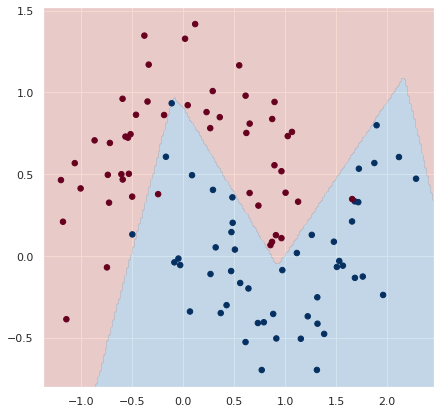

In [ ]:
visualize_classifier(mlp2, X, y)

With only 10 hidden units, the decision boundary looks somewhat more ragged. The
default nonlinearity is relu. With a single hidden layer, this
means the decision function will be made up of 10 straight line segments. If we want
a smoother decision boundary, we could add more hidden units,
add a second hidden layer, or use the tanh nonlinearity. Try a model with 2 hidden layers of 10 units each, then try a model with one hidden layer of 10 units and tanh activation.

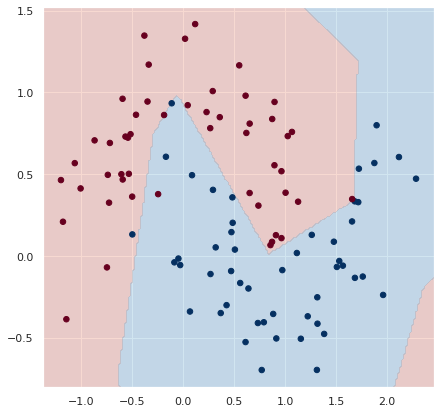

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp3 = MLPClassifier(random_state=0, solver= 'lbfgs', hidden_layer_sizes= (10,10))
mlp3.fit(X,y)
visualize_classifier(mlp3, X, y)

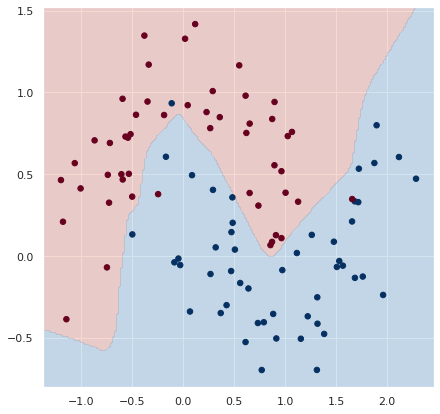

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp4 = MLPClassifier(random_state=0, solver= 'lbfgs', hidden_layer_sizes= (10,), activation = 'tanh')
mlp4.fit(X,y)
visualize_classifier(mlp4, X, y)

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights towards zero, as we did in ridge regression. The parameter for this in the MLPClassifier is alpha, and it is set to a very low value (little regularization) by default. Generate a plot with 4 different parameters for alpha [0.0001, 0.01, 1, 2] and for MLP with 2 layers of size 10 or 100.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

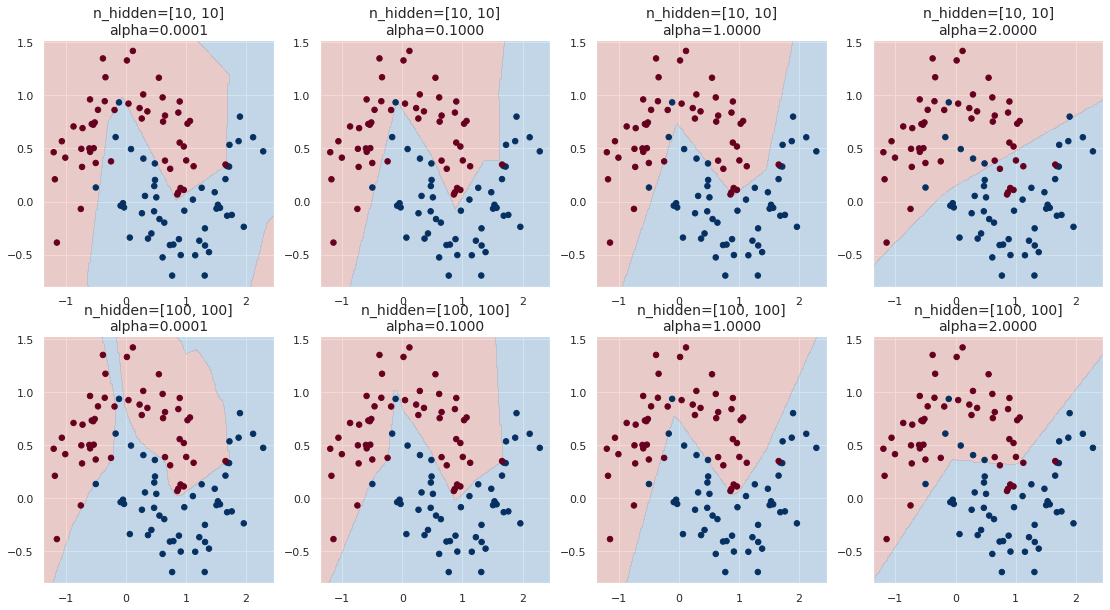

In [ ]:
import seaborn as sns
sns.set()

fig, axes = plt.subplots(2, 4, figsize=(19, 10))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
     for ax, alpha in zip(axx, [0.0001, 0.1, 1, 2]):

        # PUT YOU CODE HERE - DONE
        mlp = MLPClassifier(random_state=0, solver= 'lbfgs', hidden_layer_sizes= (n_hidden_nodes, n_hidden_nodes) , alpha = alpha)

        mlp.fit(X, y)
        visualize_classifier(mlp, X, y, ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha), fontdict={'fontsize': 14})

An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds. If the networks are
large, and their complexity is chosen properly, this should not affect accuracy too
much, but it is worth keeping in mind (particularly for smaller networks). 

**Try to generate 8 diffenet model 2 hidden layers of 100 hidden units each, solver='lbfgs' and random_state that changes from 0 to 7 and print the decision boundaries using the ```visualize_classifier``` function**

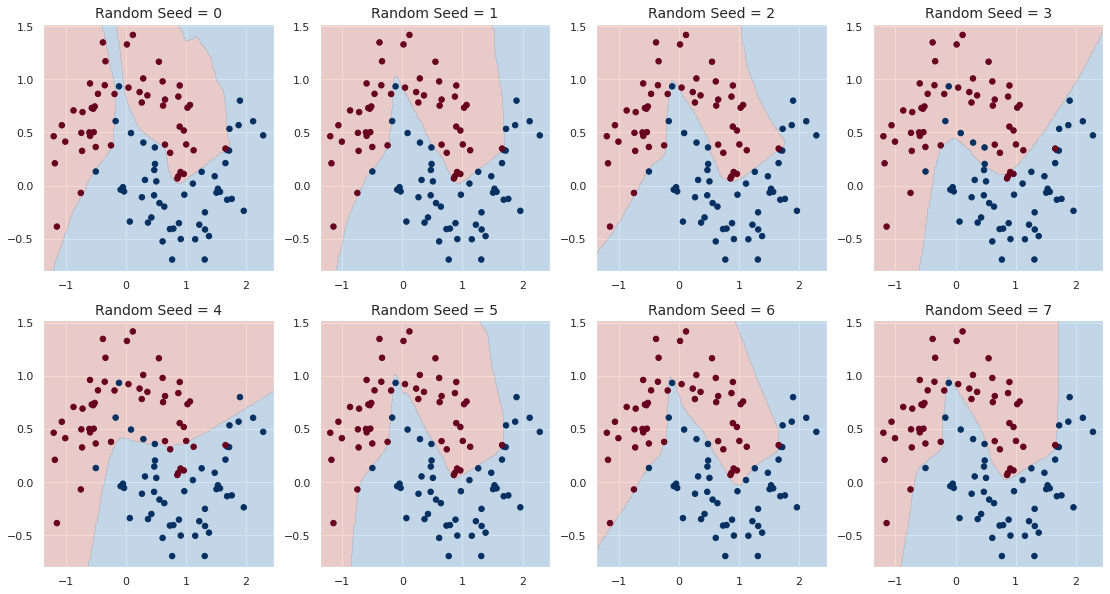

In [ ]:
import seaborn as sns
sns.set()

states = [list(range(4)),list(range(4,8))]
fig, axes = plt.subplots(2, 4, figsize=(19, 10))

for axx, states_x in zip(axes, states):
  for ax, state in zip(axx, states_x):
    mlp = MLPClassifier(random_state = state, solver= 'lbfgs', hidden_layer_sizes= (100, 100))
    mlp.fit(X, y)
    visualize_classifier(mlp, X, y, ax)
    ax.set_title("Random Seed = {}".format(state), fontdict={'fontsize': 14})

# Neural networks and the Breast cancer dataset

We will use the Breast cancer dataset to check an application of neural networks with real-world data. Load the breast cancer dataset from sklearn and print the description. 

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Print the dataset target names, the feature names and the input shape

In [ ]:
print(cancer.target_names)

['malignant' 'benign']


In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.data.shape)

(569, 30)


Now split he dataset in train and test with `random_state=0` and train a MLP with the default parameters and `random state=42`. After training print the accuracy on the training and the test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.25, random_state = 0)

Cmlp = MLPClassifier(random_state = 42)
Cmlp.fit(x_train, y_train)

train_acc = metrics.accuracy_score(y_train, Cmlp.predict(x_train))
test_acc = metrics.accuracy_score(y_test, Cmlp.predict(x_test))
print("Training accuracy: " + str(train_acc))
print("Testing accuracy: " + str(test_acc))

Training accuracy: 0.9389671361502347
Testing accuracy: 0.916083916083916


Now **normalize the data:** subtract the mean and divide by the standard deviation. You have to compute the mean and std on the training set, and use the same one for the test set.

In [ ]:
import pandas as pd
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
# compute the mean value per feature on the training set
mean_on_train = x_train.mean()

# compute the standard deviation of each feature on the training set
std_on_train = x_train.std()

# subtract the mean, and scale by inverse standard deviation
x_train_scaled = (x_train - mean_on_train) / std_on_train

# use THE SAME transformation (using training mean and std) on the test set
x_test_scaled = (x_test - mean_on_train) / std_on_train

After doing that, you can check that the mean and std has been actually set to 0 and 1.

In [ ]:
x_train_scaled.mean(axis=0)

0    -3.321026e-15
1    -1.117520e-15
2     4.155778e-15
3    -1.496195e-15
4    -2.204027e-15
5    -3.613600e-16
6     1.187496e-15
7     3.948328e-16
8    -4.081764e-15
9    -2.008044e-15
10    1.730488e-16
11   -3.450552e-16
12    2.933230e-16
13   -2.697373e-17
14    2.724868e-15
15   -4.581625e-16
16    3.109146e-16
17    4.171155e-16
18    3.101327e-16
19    1.267374e-15
20   -1.204045e-16
21   -6.880255e-17
22   -1.230888e-15
23   -3.961359e-17
24    4.425614e-15
25   -1.112308e-15
26   -5.151070e-16
27   -3.648620e-18
28   -2.440406e-15
29    2.717049e-15
dtype: float64

In [ ]:
x_train_scaled.std(axis=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

Run again the MLP on the normalized data and print the accuracy on the training and the test. Did the results improve?

In [ ]:
Cmlp_scaled = MLPClassifier(random_state=42)

Cmlp_scaled.fit(x_train_scaled, y_train)

train_acc = metrics.accuracy_score(y_train, Cmlp_scaled.predict(x_train_scaled))
test_acc = metrics.accuracy_score(y_test, Cmlp_scaled.predict(x_test_scaled))
print("Training accuracy: " + str(train_acc))
print("Testing accuracy: " + str(test_acc))

Training accuracy: 0.9929577464788732
Testing accuracy: 0.965034965034965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


You should have a warning saying that the optimization has not converged. This usually means we should add more iterations, set `max_iter` to 1000. What are the accuracies now? 

In [ ]:
Cmlp_scaled = MLPClassifier(random_state=42, max_iter = 1000)

Cmlp_scaled.fit(x_train_scaled, y_train)

train_acc = metrics.accuracy_score(y_train, Cmlp_scaled.predict(x_train_scaled))
test_acc = metrics.accuracy_score(y_test, Cmlp_scaled.predict(x_test_scaled))
print("Training accuracy: " + str(train_acc))
print("Testing accuracy: " + str(test_acc))

Training accuracy: 1.0
Testing accuracy: 0.965034965034965


Is there a way you can think of to further improve the results?

In [ ]:
# Not right now because I'm tired and a bit hungover
# please try again later

Accuracy on training set: 0.986
Accuracy on test set: 0.979


# IN CLASS LONG EXERCISE: apply it with Keras

Could you apply the same ANN above with Keras? Think about the last layer and number of neurons